In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df1 = pd.read_csv('accidents_2005_to_2007.csv',low_memory=False)
df2 = pd.read_csv('accidents_2009_to_2011.csv',low_memory=False)
df3 = pd.read_csv('accidents_2012_to_2014.csv',low_memory=False)

In [27]:
fulldf = pd.concat([df1, df2, df3], axis=0)

In [28]:
fulldf.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,NaN,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002875,2005


In [29]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1504150

In [30]:
fuldf = fulldf.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)

In [31]:
fuldf.head(5)

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005


In [32]:
fuldf.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [33]:
fuldf.dropna(inplace=True)
fuldf.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

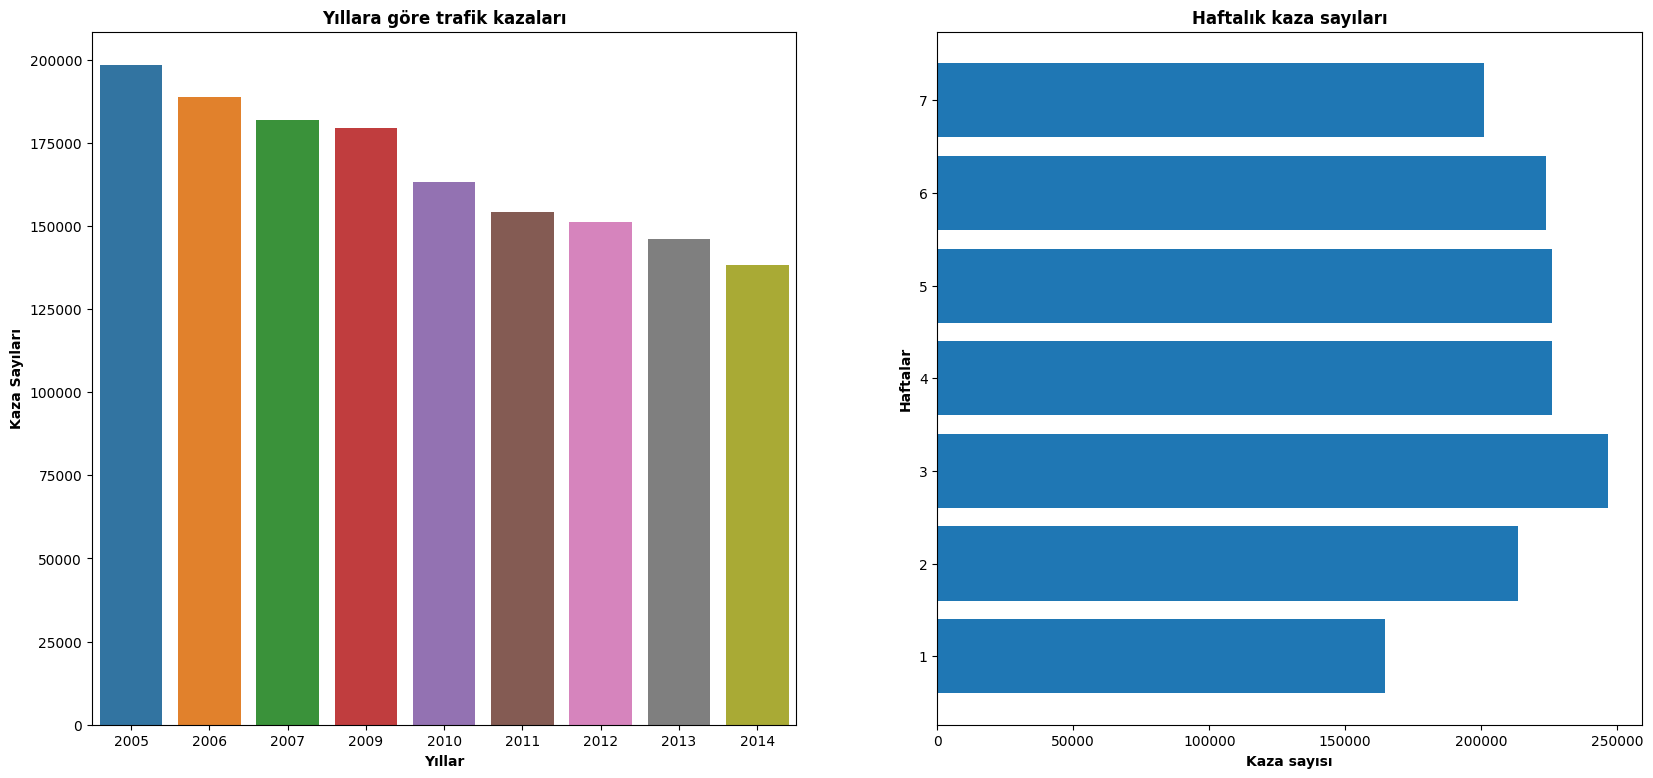

In [36]:
year = fuldf["Year"].value_counts() 

years = fuldf["Year"].unique()
num = year.values

week = fuldf["Day_of_Week"].value_counts()
weeks = fuldf["Day_of_Week"].unique()
num_w = week.values

plt.figure(figsize = (20,9),facecolor='white')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = num)
plt.ylabel("Kaza Sayıları",weight="bold")
plt.xlabel("Yıllar",weight="bold")

plt.title("Yıllara göre trafik kazaları",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(weeks,num_w)
plt.title("Haftalık kaza sayıları",weight="bold")
plt.xlabel("Kaza sayısı",weight="bold")
plt.ylabel("Haftalar",weight="bold")
plt.show()

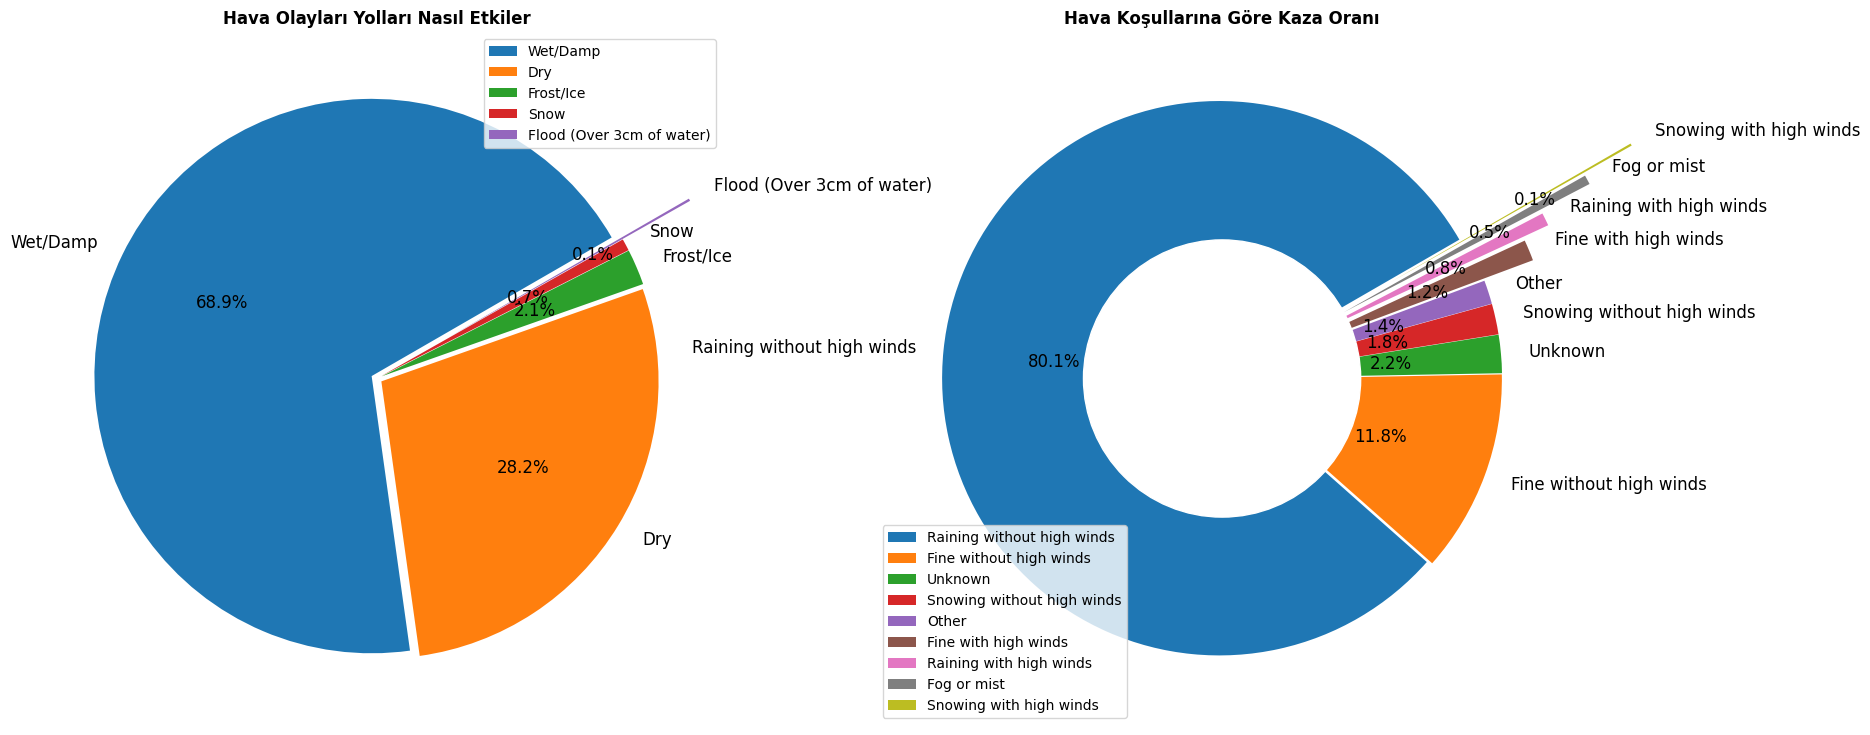

In [37]:
road_cond = fuldf["Road_Surface_Conditions"].value_counts()
road_cond_arr = fuldf["Road_Surface_Conditions"].unique()
road_num_acc_arr = road_cond.values

weather_cond = fuldf["Weather_Conditions"].value_counts() 
weather_cond_arr = fuldf["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values

plt.figure(figsize = (20,9),facecolor='white')

plt.subplot(1, 2, 1)

plt.pie(road_num_acc_arr, labels = road_cond_arr, colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.02,0.02,0.02,0.02,0.3),autopct="%1.1f%%")
plt.legend()
plt.title("Hava Olayları Yolları Nasıl Etkiler",weight="bold")


plt.subplot(1, 2, 2)

plt.pie(weather_num_acc_arr, labels = weather_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%")
plt.legend(loc ="lower left")
plt.title("Hava Koşullarına Göre Kaza Oranı",weight="bold")

my_circle = plt.Circle((0,0),0.5, color ='white')
fig = plt.gcf()
fig.gca().add_artist(my_circle)

plt.show()

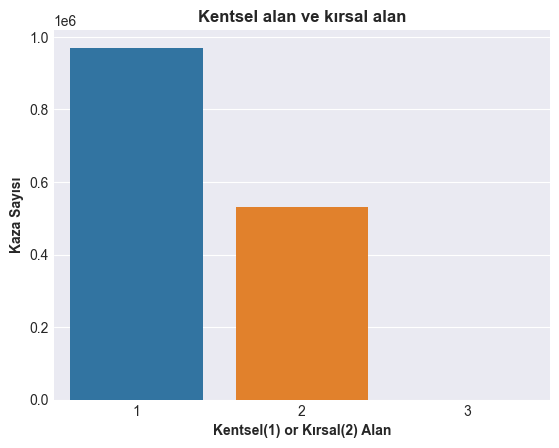

In [43]:
fuldf["Urban_or_Rural_Area"].value_counts()
#plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=fuldf)
plt.ylabel("Kaza Sayısı",weight="bold")
plt.xlabel("Kentsel(1) or Kırsal(2) Alan",weight="bold")
plt.title("Kentsel alan ve kırsal alan",weight="bold")

plt.show()

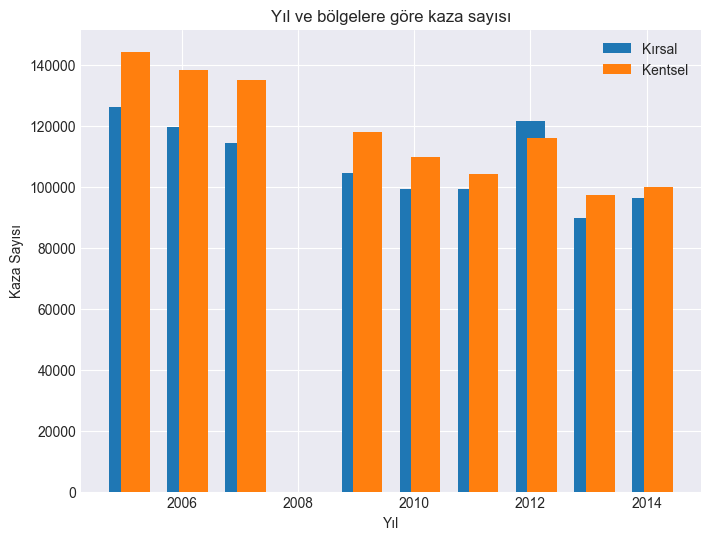

In [56]:
x = fuldf['Year']
y = fuldf['Urban_or_Rural_Area']

years = np.unique(x)

rural_accidents = []
urban_accidents = []

for year in years:
    rural_count = y[(x == year) & (fuldf['Urban_or_Rural_Area'] == 1 )].sum()
    urban_count = y[(x == year) & (fuldf['Urban_or_Rural_Area'] == 2 )].sum()
    
    rural_accidents.append(rural_count)
    urban_accidents.append(urban_count)


plt.figure(figsize=(8, 6))

plt.bar(years, rural_accidents, label='Kırsal',width=0.5)
plt.bar(years + 0.20, urban_accidents, label='Kentsel',width=0.5)

plt.xlabel('Yıl')
plt.ylabel('Kaza Sayısı')
plt.title('Yıl ve bölgelere göre kaza sayısı')
plt.legend()

plt.show()

    
